# Harmonics 

### George Tzanetakis, University of Victoria 

In this notebook we will look into how our ear perceives collections of harmonically related sinusoids (i.e sinusoids that are all multiples of a common "fundamental" frequency) as single sound sources. 

In [4]:
%matplotlib notebook 
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd

Let's create a sinusoid with a frequency of 220Hz at the audio rate of 44100 samples per second. We also generate 5 seconds. The last line of the next cell shows a small player and allows us to hear the generated sound wave. 


In [5]:
# generate a discrete time sinusoid signal with a specified amplitude, frequency, duration, and phase 
def sinusoid(freq=440.0, dur=1.0, srate=44100.0, amp=1.0, phase = 0.0): 
    t = np.linspace(0,dur,int(srate*dur))
    data = amp * np.sin(2*np.pi*freq *t+phase)
    return data

freq = 523 
srate = 44100
data = sinusoid(freq = freq, dur = 2.0, amp = 0.5)
ipd.Audio(data,rate=srate)

In [7]:
data1 = sinusoid(freq = freq, dur = 2.0, amp = 1.0)
data2 = sinusoid(freq = 2*freq, dur = 2.0, amp = 0.5)
data3 = sinusoid(freq = 3*freq, dur = 2.0, amp = 0.25)
sound = data1 + data2 + data3 
ipd.Audio(sound,rate=srate)




In [15]:
def harmonics(fundamental=440.0, dur=1.0, srate=44100.0, amps = [1.0]):
    # normalize amps 
    amps = amps / np.sum(amps)
    t = np.linspace(0, dur, int(srate*dur))
    data = np.zeros(len(t))
    for (i,a) in enumerate(amps): 
        hfreq = (i+1) * fundamental
        data += a * np.sin(2*np.pi* hfreq *t)
    return data


# play sound with 3 harmonics 
data = harmonics(fundamental = freq, dur = 2.0, amps = [1.0, 0.5, 0.25])

# play the corresponding audio 
ipd.Audio(data,rate=srate)

Now let's look at a plot of our signal. In order to visualize what is happening we will view 0.01 seconds or 10 milliseconds of audio signal. 

<IPython.core.display.Javascript object>


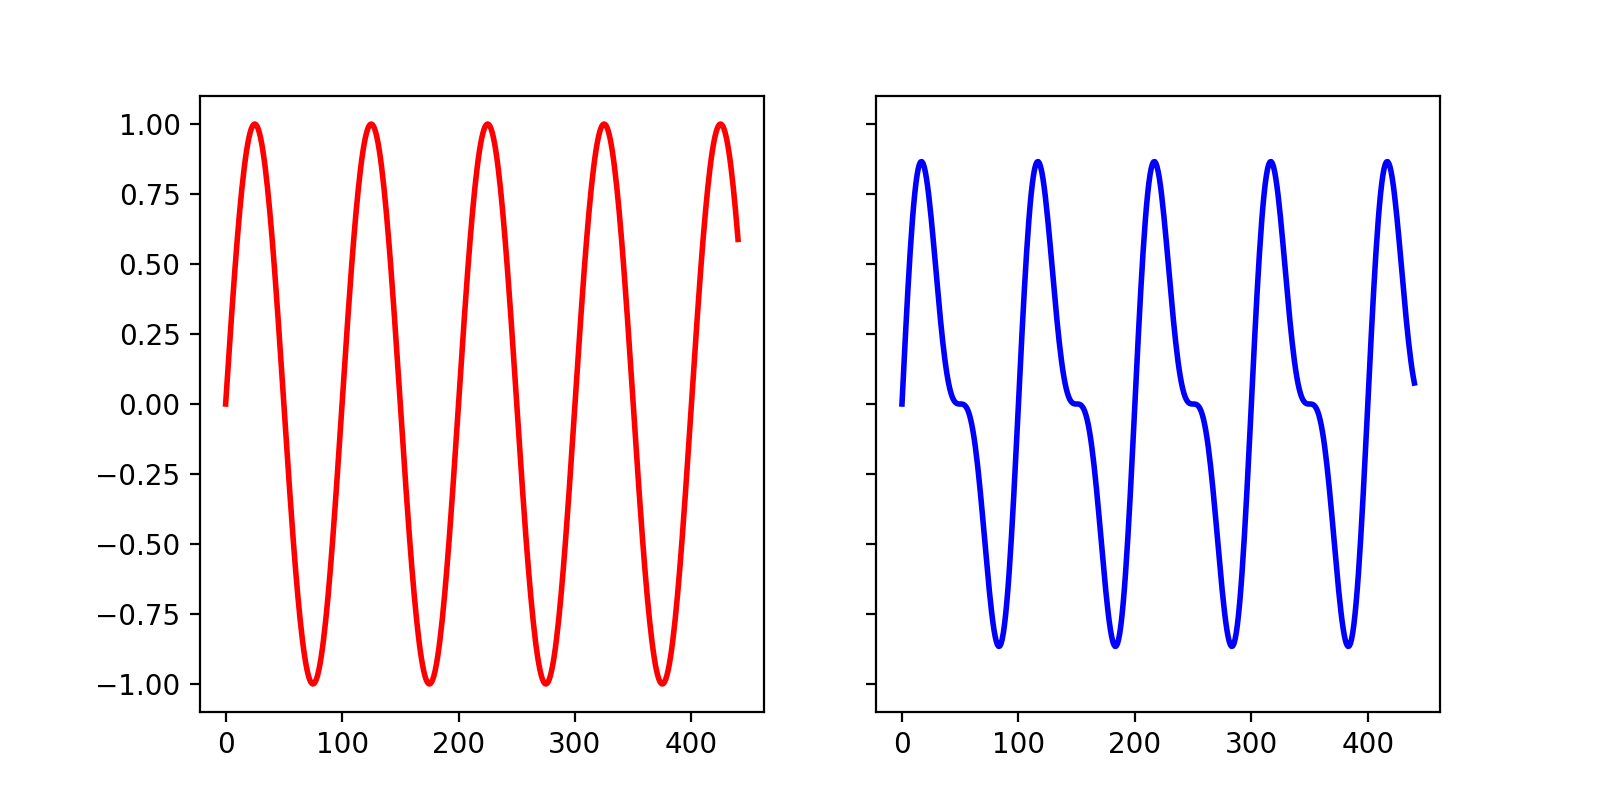

In [5]:
# plot original sinusoid and a corresponding pitched sound with two harmonics 
F0 = 440 
amps = [1.0, 0.5]

fig, (ax1,ax2) = plt.subplots(1,2, sharey=True, figsize=(8, 4))
ax1.plot(sinusoid(freq=F0, dur =0.01, amp=1.0), lw=2, color='red')
ax2.plot(harmonics(fundamental=F0, dur =0.01, amps=amps), lw=2, color='blue')

<IPython.core.display.Javascript object>


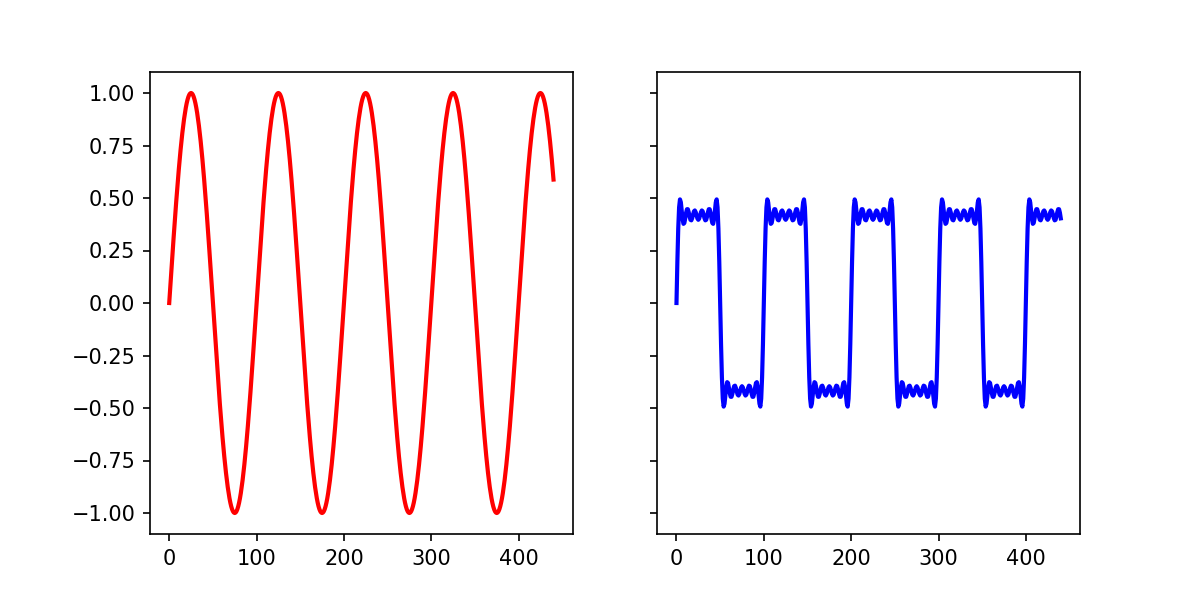

In [16]:
# plot original sinusoid and a corresponding pitched sound with a specific pattern 
# of harmonics that generates a square wave 
F0 = 440 
amps = [1.0, 0.0, 1.0/3.0, 0.0, 1.0/5.0, 0.0, 1.0/7.0, 0.0, 1.0/9.0, 0.0, 1.0/11.0]

fig, (ax1,ax2) = plt.subplots(1,2, sharey=True, figsize=(8, 4))
ax1.plot(sinusoid(freq=F0, dur =0.01, amp=1.0), lw=2, color='red')
ax2.plot(harmonics(fundamental=F0, dur =0.01, amps=amps), lw=2, color='blue')

In [17]:
F0 = 440 
amps = [1.0, 0.0, 1.0/3.0, 0.0, 1.0/5.0, 0.0, 1.0/7.0, 0.0, 1.0/9.0, 0.0, 1.0/11.0]
data = harmonics(fundamental = F0, dur = 2.0, amps = amps)
ipd.Audio(data,rate=srate)

<IPython.core.display.Javascript object>


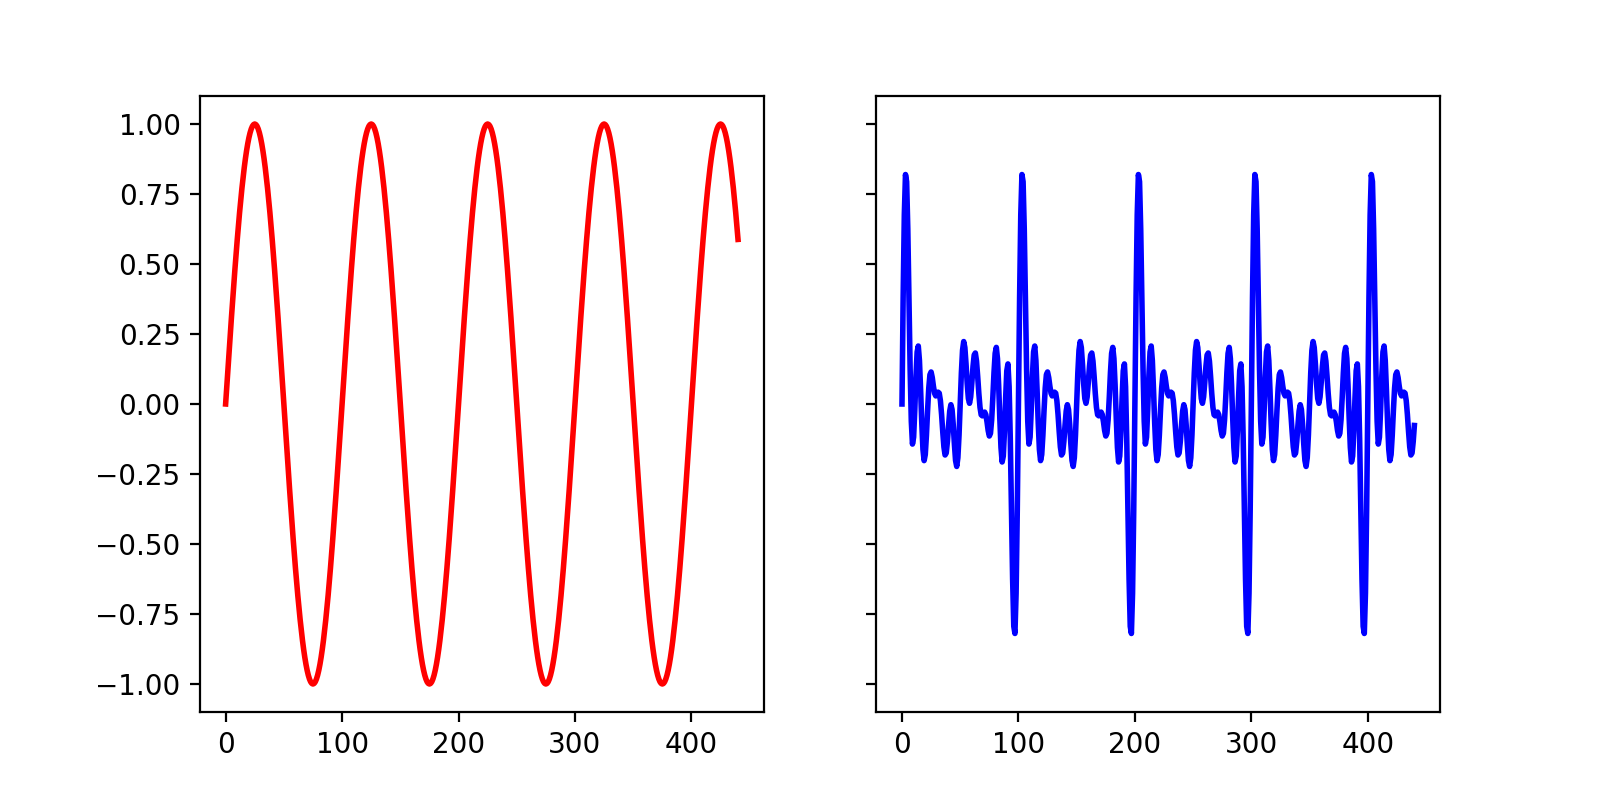

In [9]:
F0 = 440 
amps = np.random.random(10)
fig, (ax1,ax2) = plt.subplots(1,2, sharey=True, figsize=(8, 4))
ax1.plot(sinusoid(freq=F0, dur =0.01, amp=1.0), lw=2, color='red')
ax2.plot(harmonics(fundamental=F0, dur =0.01, amps=amps), lw=2, color='blue')

In [18]:
data = harmonics(fundamental = F0, dur = 2.0, amps = amps)
ipd.Audio(data,rate=srate)

In [19]:
def random_sines(fundamental=440.0, dur=1.0, srate=44100.0, amps = [1.0]):
    # normalize amps 
    amps = amps / np.sum(amps)
    t = np.linspace(0, dur, int(srate*dur))
    data = np.zeros(len(t))
    for (i,a) in enumerate(amps): 
        if (i==0): 
            hfreq = fundamental
        else: 
            hfreq = 10.0 * np.random.random() * fundamental
        data += a * np.sin(2*np.pi* hfreq *t)
    return data


<IPython.core.display.Javascript object>


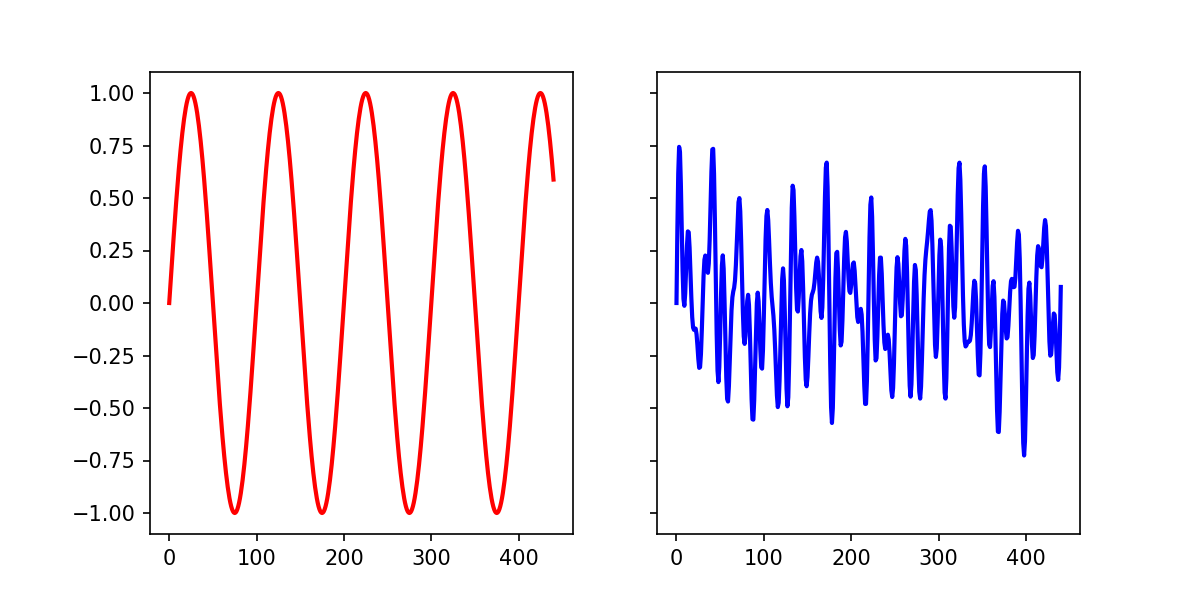

In [20]:
F0 = 440 
amps = np.random.random(10)
fig, (ax1,ax2) = plt.subplots(1,2, sharey=True, figsize=(8, 4))
ax1.plot(sinusoid(freq=F0, dur =0.01, amp=1.0), lw=2, color='red')
ax2.plot(random_sines(fundamental=F0, dur =0.01, amps=amps), lw=2, color='blue')

In [13]:
data = random_sines(fundamental = F0, dur = 2.0, amps = amps)
ipd.Audio(data,rate=srate)

<IPython.core.display.Javascript object>


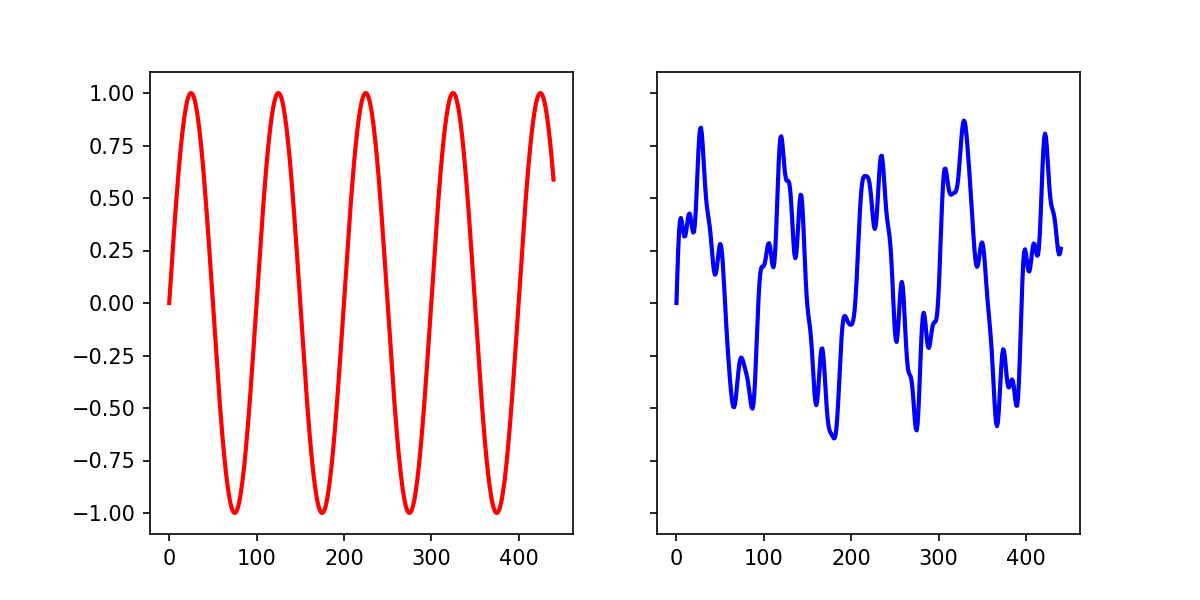

In [21]:
amps = [1.0, 0.0, 1.0/3.0, 0.0, 1.0/5.0, 0.0, 1.0/7.0, 0.0, 1.0/9.0, 0.0, 1.0/11.0]
data = random_sines(fundamental = F0, dur = 2.0, amps = amps)

fig, (ax1,ax2) = plt.subplots(1,2, sharey=True, figsize=(8, 4))
ax1.plot(sinusoid(freq=F0, dur =0.01, amp=1.0), lw=2, color='red')
ax2.plot(random_sines(fundamental=F0, dur =0.01, amps=amps), lw=2, color='blue')

ipd.Audio(data,rate=srate)